# Example: looking at DPC data


Add missing python modules
```
bash$ docker-compose -f ./docker/docker-compose-dev.yml exec --user 0 tdmqc /bin/bash -c 'cd ${TDMQ_DIST}/examples/dpc && fake_user.sh pip3 install tifffile'
```

Setup the source and do some preloading.
```
bash$ docker-compose -f ./docker/docker-compose-dev.yml exec --user $(id -u) tdmqc /bin/bash -c 'cd ${TDMQ_DIST}/examples/dpc && fake_user.sh python3 setup_source.py --source temperature'
```

In [1]:
import numpy as np
from tdmq.client import Client

INFO:tdmq.client.client:Logging is active.


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
c = Client()

In [4]:
srcs = c.get_sources({'id': "dpc/meteo-temp-mosaic/v0"})
assert len(srcs) > 0
s = srcs[0]

In [5]:
ts = s.timeseries()

In [6]:
(time, data) = ts[4]

In [7]:
temp = data['TEMP'] * (data['TEMP'] > -9000.0)

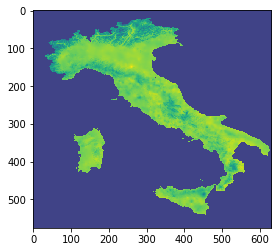

In [8]:
plt.imshow(temp)

In [9]:
(_, sardinia) = ts[4, 300:440, 100:200]

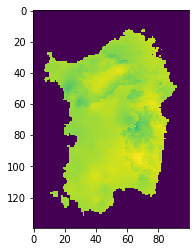

In [10]:
plt.imshow(sardinia['TEMP'] * (sardinia['TEMP'] > -9000.0))

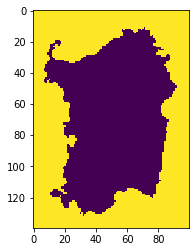

In [11]:
sea = sardinia['TEMP'] == 0
plt.imshow(sea)

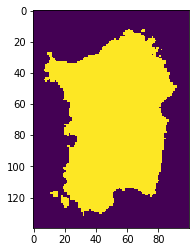

In [12]:
land = sardinia['TEMP'] > 0
plt.imshow(land)

In [13]:
(time, data) = ts[:, 300:440, 100:200]

In [14]:
temp = data['TEMP'] * (data['TEMP'] > -9000)

In [15]:
max_temp = temp.reshape(len(time), -1).max(axis=1)
min_temp = (temp + 200 * (temp == 0.0)).reshape(len(time), -1).min(axis=1)

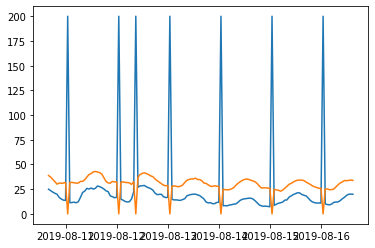

In [16]:
plt.plot(time, np.stack([min_temp, max_temp], axis=1))

In [17]:
good_frames_selector = temp.reshape(len(time), -1).max(axis=1) > 0

In [18]:
good_time = time[good_frames_selector]
good_temp = temp[good_frames_selector]

In [19]:
max_temp = good_temp.reshape(len(good_time), -1).max(axis=1)
min_temp = (good_temp + 200 * (good_temp == 0.0)).reshape(len(good_time), -1).min(axis=1)

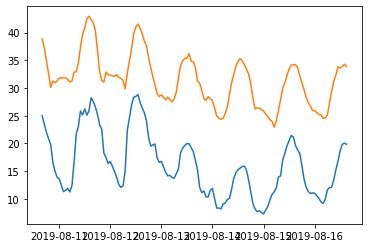

In [20]:
plt.plot(good_time, np.stack([min_temp, max_temp], axis=1))